# 建立多层感知器模型包含两个隐藏层

## 1.加入两个隐藏层并且加入 DropOut 功能

In [3]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
from keras.datasets import mnist

from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label) = mnist.load_data()

x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


#### 建立模型

In [4]:
model = Sequential()

#### 加入“输入层”与“隐藏层 1”

In [5]:
model.add(Dense(units = 1000,    # 定义“隐藏层”神经元个数为1000
               input_dim = 784, # 设置“输入层”神经元个数为784 
               kernel_initializer = 'normal', # 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
               activation = 'relu' # 定义激活函数为relu
               ))

In [6]:
model.add(Dropout(0.5))

#### 加入“隐藏层 2”

In [7]:
model.add(Dense(units = 1000,    # 定义“隐藏层”神经元个数为1000
               kernel_initializer = 'normal', # 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
               activation = 'relu' # 定义激活函数为relu
               ))

In [8]:
model.add(Dropout(0.5))

#### 加入“输出层”

In [9]:
model.add(Dense(units = 10, # 定义“输出层”神经元个数为10
                kernel_initializer = 'normal',# 使用 normal distribution 正态分布的随机数来初始化weight（权重）与bias（偏差）
                activation = 'softmax' # 定义激活函数为 softmax
               ))

## 2.查看模型的摘要

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


## 3.查看训练过程的准确率

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 18s - loss: 0.3672 - acc: 0.8856 - val_loss: 0.1359 - val_acc: 0.9597
Epoch 2/10
 - 17s - loss: 0.1591 - acc: 0.9522 - val_loss: 0.0982 - val_acc: 0.9703
Epoch 3/10
 - 17s - loss: 0.1163 - acc: 0.9638 - val_loss: 0.0860 - val_acc: 0.9732
Epoch 4/10
 - 17s - loss: 0.0963 - acc: 0.9702 - val_loss: 0.0844 - val_acc: 0.9742
Epoch 5/10
 - 17s - loss: 0.0854 - acc: 0.9731 - val_loss: 0.0843 - val_acc: 0.9758
Epoch 6/10
 - 17s - loss: 0.0761 - acc: 0.9759 - val_loss: 0.0785 - val_acc: 0.9770
Epoch 7/10
 - 17s - loss: 0.0643 - acc: 0.9789 - val_loss: 0.0753 - val_acc: 0.9787
Epoch 8/10
 - 17s - loss: 0.0604 - acc: 0.9806 - val_loss: 0.0834 - val_acc: 0.9774
Epoch 9/10
 - 17s - loss: 0.0570 - acc: 0.9818 - val_loss: 0.0742 - val_acc: 0.9797
Epoch 10/10
 - 17s - loss: 0.0525 - acc: 0.9828 - val_loss: 0.0763 - val_acc: 0.9790


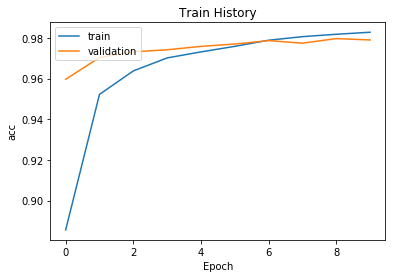

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',metrics = ['accuracy'])

train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot,validation_split = 0.2,
                          epochs = 10,batch_size = 200,verbose = 2)

%matplotlib inline 
# 设置matplotlib 在jupyter note 网页内显示图形，如果少了这一指令，就会另打开一个窗口显示图形。
import matplotlib.pyplot as plt
def show_train_history(train_history,
                      train, # 训练数据的执行结果
                      validation # 验证数据的执行结果
                      ):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History') # 显示图的标题
    plt.ylabel(train) # 显示y轴的标签
    plt.xlabel('Epoch') # 设置x轴的标签是‘Epoch’
    plt.legend(['train','validation'],loc='upper left') # 设置图例是显示'train''validation'，位置在左上角
    plt.show()

show_train_history(train_history,'acc','val_acc')

### a.无论是训练还是验证，准确率都越来越高 
### b.在epoch训练后期，“acc训练的准确率”比“val_acc验证的准确率”高。但是“训练的准确率”与“验证的准确率”差距变小，这代表已经大致解决了过度拟合的问题。

## 4.查看准确率

In [13]:
scores = model.evaluate( # 使用 model.evaluate 评估模型的准确率，评估后的准确率会存储在scores中。
    x_Test_normalize, # 测试数据的features（数字图像的特征值）
    y_Test_OneHot # 测试数据的label（数字图像真实的值）
)
print()
print('accuracy=',scores[1]) # 显示准确率

10000/10000 [==============================] - 1s 146us/step

accuracy= 0.9808


从以上执行结果可知准确率是0.9797，准确率并没有显著提升。